# Driven Damped Pendulum (DDP)

Driven dampled pendulum 방정식이 다음과 같다.  
$$ \ddot{\phi} + 2 \beta \dot{\phi} + \omega_0^2 \sin \phi = \gamma \omega_0^2 \cos \omega t $$

## 0. Pendulum
선형화된 단순조화진동자의 운동방정식은 다음과 같다.  
$$ \ddot{\phi} + w^2 \sin \phi = 0$$
2차 미분방정식을 2개의 1차 미분방정식으로 분리하면 다음과 같다.  
$$ \dot{\phi} = v, \dot{v}= - w^2 \sin \phi$$

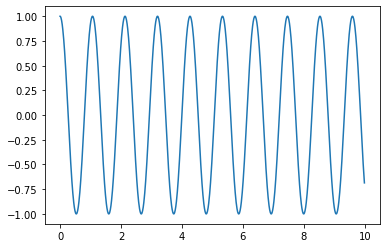

In [4]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.integrate import odeint

w0=2*np.pi
state0 = [1.0, 0.0]
t = np.arange(0.0, 10.0, 0.01)

def sp(state, t):
    x, v = state 
    return v, -w0**2*np.sin(x) # derivatives

states = odeint(sp, state0, t)
plt.plot(t,states[:,0])

In [6]:
w, w0, beta = 2*np.pi, 1.5*2*np.pi, 1.5*2*np.pi/4 
state0 = [0, 0.0]
t = np.arange(0.0, 20.0, 0.01)

def f(state, t, gamma):
    x, v = state 
    return v, -2*beta*v- w0*w0*np.sin(x) + gamma*w0*w0*np.cos(w*t) # derivatives

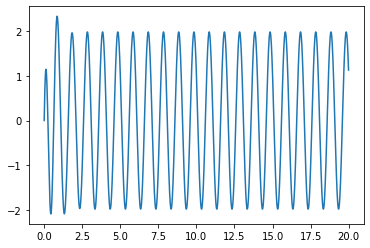

In [7]:
gamma=0.2
states = odeint(f, state0, t, args= (gamma,))
plt.plot(t,states[:,1])

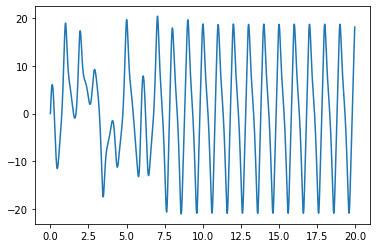

In [8]:
gamma=1.06
states = odeint(f, state0, t, args= (gamma,))
plt.plot(t,states[:,1])

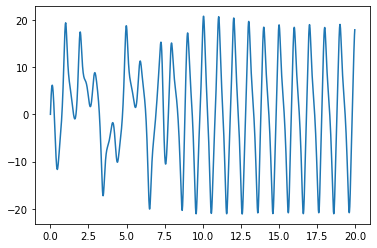

In [9]:
gamma=1.07
states = odeint(f, state0, t, args= (gamma,))
plt.plot(t,states[:,1])

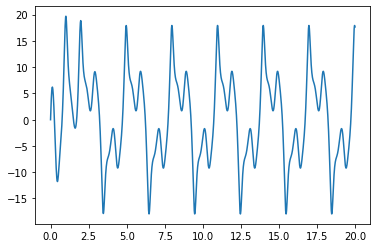

In [10]:
gamma=1.08
states = odeint(f, state0, t, args= (gamma,))
plt.plot(t,states[:,1])

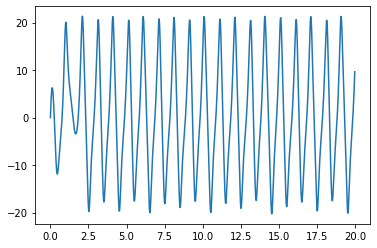

In [11]:
gamma=1.09
states = odeint(f, state0, t, args= (gamma,))
plt.plot(t,states[:,1])

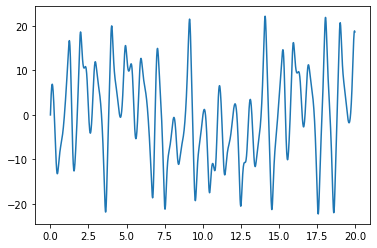

In [12]:
gamma=1.2
states = odeint(f, state0, t, args= (gamma,))
plt.plot(t,states[:,1])

## Sensitive dependence on initial conditions

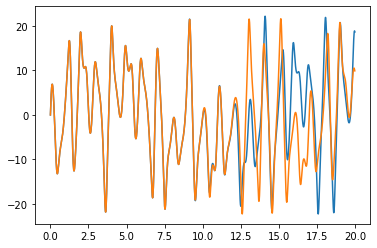

In [13]:
states1 = odeint(f, [0, 0], t, args= (gamma,))
states2 = odeint(f, [0, 0.0001], t, args= (gamma,))
plt.plot(t,states1[:,1])
plt.plot(t,states2[:,1])

## Bifurcation Diagram

In [15]:
N=80
X = np.zeros((N,N))
Y = np.zeros((N,N))

r=np.linspace(0.9,1.2,N)
xi=np.linspace(0.01,1,N)

t = np.arange(0.0, 30.0, 1)
for i in range(N):
    for j in range(N):
        gamma, x0 = r[i], xi[j]
        ts=odeint(f, [0, x0], t, args= (gamma,))[-1,1]
            
        Y[i][j]=ts
        X[i][j]=gamma

Text(0, 0.5, 'phi')

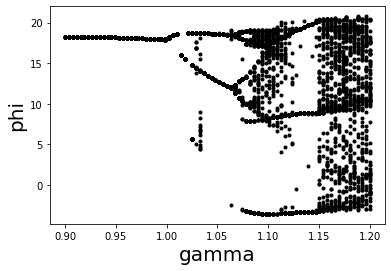

In [16]:
plt.plot(X,Y,'.',c='black');
plt.xlabel("gamma",fontsize="20")
plt.ylabel("phi",fontsize="20")